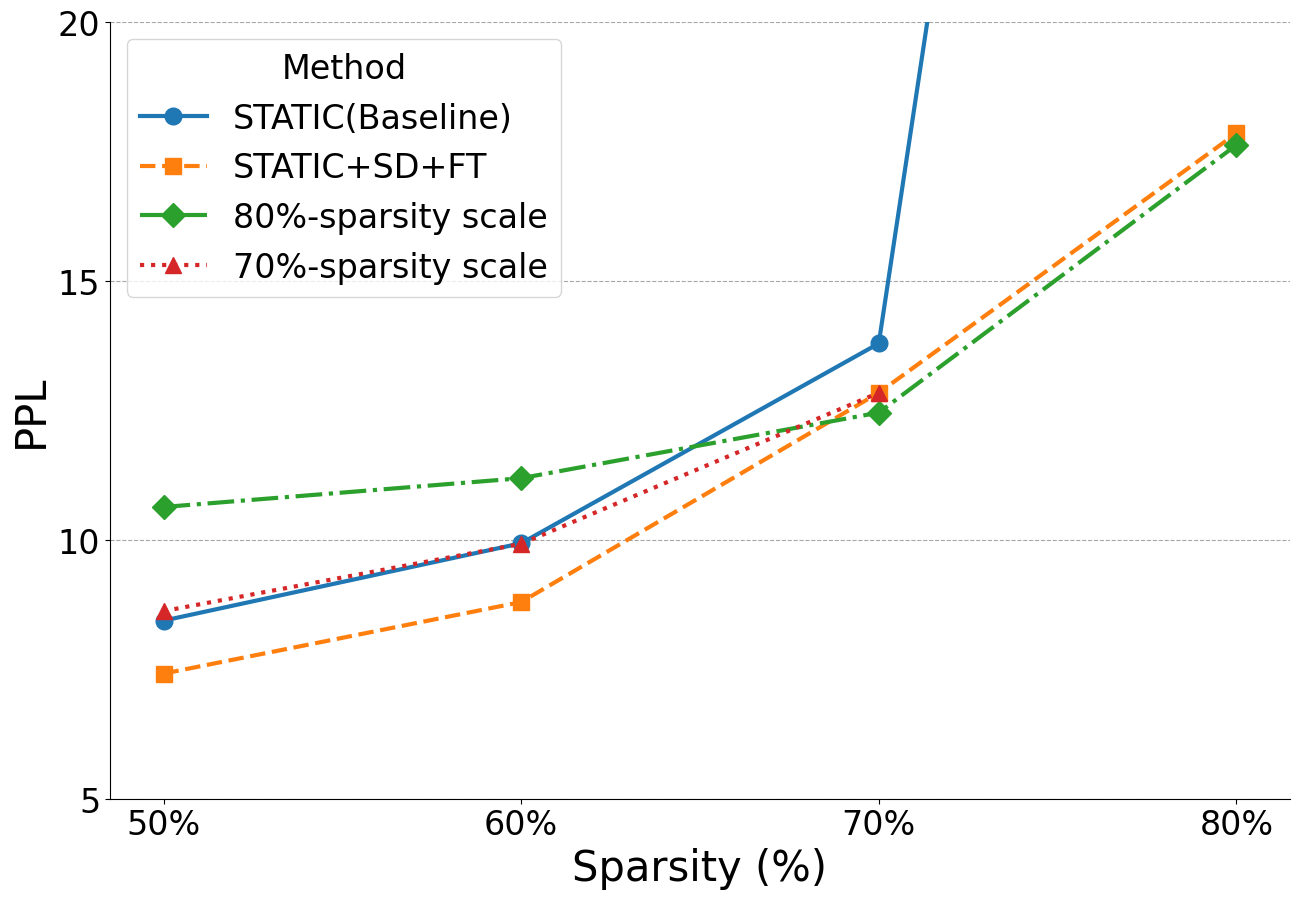

In [22]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime

# 数据
sparsity_levels = [50, 60, 70, 80]  # 稀疏度
ppl_data = {'STATIC(Baseline)': [8.439, 9.933, 13.792, 59.539], 'STATIC+SD+FT': [7.416, 8.798, 12.839, 17.85], '80%-sparsity scale': [ 10.634, 11.19, 12.456, 17.625], '70%-sparsity scale': [8.623, 9.922, 12.839, None]}

# 定义颜色和线型（按顺序匹配不同方法）
colors = [
    "#1f77b4",  # 蓝色
    "#ff7f0e",  # 橙色
    "#2ca02c",  # 绿色
    "#d62728",  # 红色
    "#9467bd",  # 紫色
    "#8c564b",  # 棕色
    "#e377c2",  # 粉色
    "#7f7f7f",  # 灰色
    "#bcbd22",  # 黄色
    "#17becf"   # 青色
]
linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']

# 调整字体大小和全局参数
plt.rcParams.update({
    'font.size': 40,           # 全局字体大小
    'axes.labelsize': 40,      # 坐标轴标签字体大小
    'axes.titlesize': 40,      # 标题字体大小
    'legend.fontsize': 24,     # 图例字体大小
    'xtick.labelsize': 24,     # x轴刻度字体大小
    'ytick.labelsize': 24,     # y轴刻度字体大小
    'lines.linewidth': 3.0     # 全局线条粗细
})

# 创建图形和轴
fig, ax = plt.subplots(figsize=(14, 10))  # 调整figsize以使图形更清晰

# 绘制每种方法的曲线
for i, (method, values) in enumerate(ppl_data.items()):
    x = [sparsity_levels[j] for j, v in enumerate(values) if v is not None]
    y = [v for v in values if v is not None]
    color = colors[i % len(colors)]
    linestyle = linestyles[i % len(linestyles)]
    marker = markers[i % len(markers)]
    ax.plot(x, y, label=method, color=color, linestyle=linestyle, marker=marker, markersize=12)

# 设置标题和标签
ax.set_xlabel("Sparsity (%)", fontsize=30)
ax.set_ylabel("PPL", fontsize=30)

# 设置y轴范围
ax.set_ylim(5, 20)  # 设置y轴上限为40

# 设置x轴刻度
ax.set_xticks([50, 60, 70, 80])
ax.set_xticklabels(['50%', '60%', '70%', '80%'])

# 设置网格线
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# 去除顶部和右侧边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 设置刻度
ax.xaxis.set_major_locator(ticker.FixedLocator([50, 60, 70, 80]))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.tick_params(axis='both', which='major', labelsize=24)

# 添加图例
ax.legend(title="Method", title_fontsize=24, fontsize=24, loc='upper left')

# 调整布局并保存图像
plt.tight_layout()

# 获取当前日期并格式化
current_date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# 调整布局并保存图像
plt.tight_layout()
plt.savefig(f'{current_date}-LLama-3_Sparsity_scale.pdf', dpi=600)
plt.show()

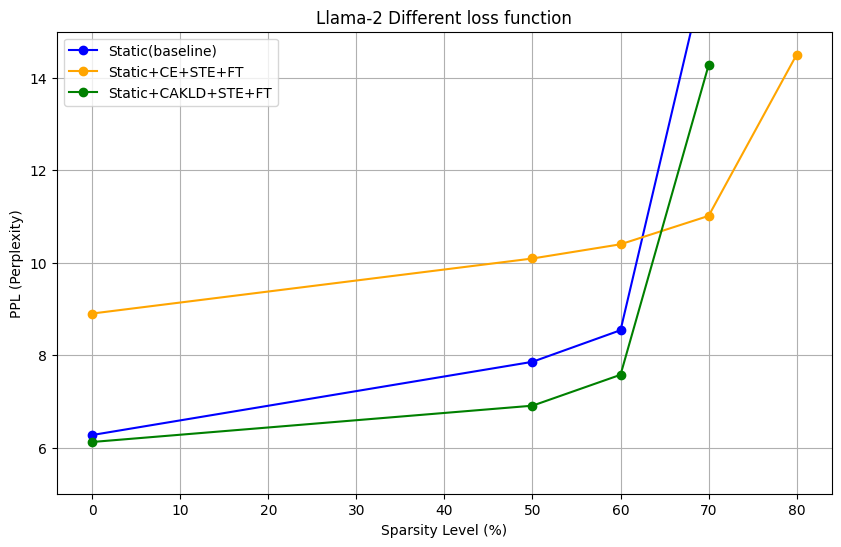

In [16]:
ppl_data = {
    "Static(baseline)": [6.2704, 7.8552, 8.5394, 16.632, 2620.6383],
    "Static+CE+STE+FT": [8.9, 10.0915, 10.3991, 11.0136, 14.5048],
    "Static+CAKLD+STE+FT": [6.1196, 6.9055, 7.5746, 14.2758, None],
}
colors = ["blue", "orange", "green"]  # 自定义颜色顺序
import matplotlib.pyplot as plt

# 稀疏度
sparsity_levels = [0, 50, 60, 70, 80]  # 添加稀疏度为 0 的点

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制每种方法的折线图
for (method, values), color in zip(ppl_data.items(), colors):
    x = [sparsity_levels[i] for i, v in enumerate(values) if v is not None]  # 包含稀疏度为 0 的点
    y = [v for v in values if v is not None]  # 包含稀疏度为 0 的值
    plt.plot(x, y, marker='o', label=method, color=color)

# 添加标题和标签
plt.xlabel("Sparsity Level (%)")
plt.ylabel("PPL (Perplexity)")

# 设置y轴范围
plt.ylim(5, 15)  # 根据数据调整范围

# 添加图例
plt.legend()

# 显示网格
plt.grid(True)

# 设置标题
title = "Llama-2 Different loss function"
plt.title(title)

# 保存图像
plt.savefig(f"{title}.png")

# 显示图形
plt.show()

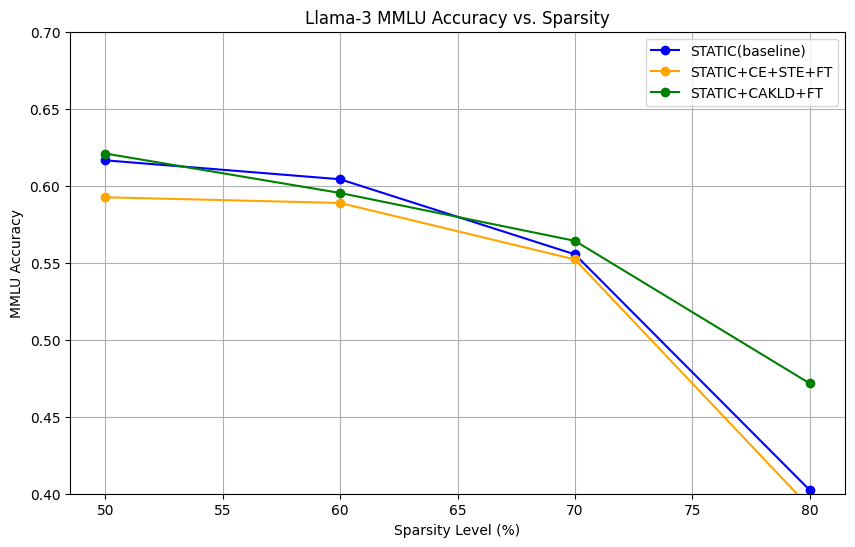

In [25]:
mmlu_data = {
    "STATIC(baseline)": [0.6165, 0.6042, 0.5554, 0.4023],
    "STATIC+CE+STE+FT": [0.5925, 0.5888, 0.5521, 0.3911],
    "STATIC+CAKLD+FT": [ 0.6209, 0.5953, 0.5642, 0.4716]
}

# 自定义颜色顺序
colors = ["blue", "orange", "green", "red", "purple"]

import matplotlib.pyplot as plt

# 稀疏度
sparsity_levels = [50, 60, 70, 80]  # 包括 0% 稀疏度

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制每种方法的折线图
for (method, values), color in zip(mmlu_data.items(), colors):
    x = [sparsity_levels[i] for i, v in enumerate(values) if v is not None]  # 包括稀疏度为 0 的点
    y = [v for v in values if v is not None]  # 包括稀疏度为 0 的值
    plt.plot(x, y, marker='o', label=method, color=color)

# 添加标题和标签
plt.xlabel("Sparsity Level (%)")
plt.ylabel("MMLU Accuracy")

# 设置y轴范围
plt.ylim(0.4, 0.7)  # 根据数据调整范围

# 添加图例
plt.legend()

# 显示网格
plt.grid(True)

# 设置标题
title = "Llama-3 MMLU Accuracy vs. Sparsity"
plt.title(title)

# 保存图像
plt.savefig(f"{title}.png")

# 显示图形
plt.show()